In [4]:
import numpy as np
import matplotlib.image as img
import os

from matplotlib import pyplot as plt

images = {}
for filename in os.listdir('StarterFiles/Test1'):
    images[filename] = img.imread('StarterFiles/Test1/' + filename) 

    
col = 150
row = 130

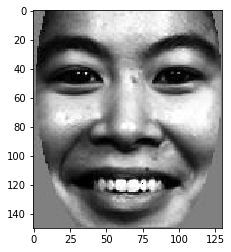

In [7]:
plt.imshow(images['00154fa010.940128.jpg'], interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()


In [43]:
# convert each to N^2 x 1 matrix

flattened = {}

for key in images:
    flattened[key] = images[key].flatten()

In [44]:
mean = np.zeros(len(flattened['00154fa010.940128.jpg']))
for key in flattened: 
    mean += flattened[key]

mean /= len(mean)

mean

array([0.29133333, 0.29225641, 0.294     , ..., 0.29148718, 0.29148718,
       0.29148718])

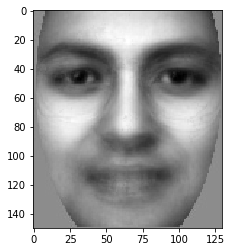

In [45]:
# just for fun, lets take a peek at the mean face :)

MEANFACE = mean.reshape(150, 130)
plt.imshow(MEANFACE, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

In [46]:
mean

array([0.29133333, 0.29225641, 0.294     , ..., 0.29148718, 0.29148718,
       0.29148718])

In [48]:
mean_adjusted = {}

for key in flattened: 
    mean_adjusted[key] = flattened[key] - mean


In [62]:
data = list(mean_adjusted.values())
data = [c.reshape(-1,1) for c in data]
a = np.column_stack(tuple(data))

covar = a @ a.T
covar

array([[730472.60517156, 732526.12900417, 736768.340688  , ...,
        730617.85914366, 730617.85914366, 730617.85914366],
       [732526.12900417, 735289.61964351, 739044.76862892, ...,
        732912.37744406, 732912.37744406, 732912.37744406],
       [736768.340688  , 739044.76862892, 744171.799184  , ...,
        737343.57867815, 737343.57867815, 737343.57867815],
       ...,
       [730617.85914366, 732912.37744406, 737343.57867815, ...,
        731022.11219373, 731022.11219373, 731022.11219373],
       [730617.85914366, 732912.37744406, 737343.57867815, ...,
        731022.11219373, 731022.11219373, 731022.11219373],
       [730617.85914366, 732912.37744406, 737343.57867815, ...,
        731022.11219373, 731022.11219373, 731022.11219373]])

In [84]:
covar2 = a.T @ a
covar2

array([[4.14752790e+08, 3.79098890e+08, 3.73139332e+08, ...,
        3.41246153e+08, 3.71899394e+08, 3.68650713e+08],
       [3.79098890e+08, 4.14503094e+08, 3.75097029e+08, ...,
        3.44585190e+08, 3.72629721e+08, 3.76433666e+08],
       [3.73139332e+08, 3.75097029e+08, 4.18624191e+08, ...,
        3.57609278e+08, 3.75887177e+08, 3.76168672e+08],
       ...,
       [3.41246153e+08, 3.44585190e+08, 3.57609278e+08, ...,
        4.17874008e+08, 3.48823630e+08, 3.68458126e+08],
       [3.71899394e+08, 3.72629721e+08, 3.75887177e+08, ...,
        3.48823630e+08, 4.15653507e+08, 3.83590384e+08],
       [3.68650713e+08, 3.76433666e+08, 3.76168672e+08, ...,
        3.68458126e+08, 3.83590384e+08, 4.17454630e+08]])

In [85]:
covar2_eigvals, covar2_eigvecs = np.linalg.eig(covar2)

In [86]:
covar2_eigvals

array([1.57927108e+10, 4.62134184e+08, 3.58959329e+08, 1.96637546e+08,
       1.52282045e+08, 1.05693334e+08, 9.71796001e+07, 9.52223193e+07,
       7.80430394e+07, 6.96059055e+07, 6.77356887e+07, 6.27530133e+07,
       5.87948191e+07, 5.48847212e+07, 4.72949567e+07, 4.48419959e+07,
       4.11811895e+07, 3.87832451e+07, 3.56800856e+07, 3.45995357e+07,
       3.23405667e+07, 3.04589514e+07, 2.97892398e+07, 2.91400513e+07,
       2.69439142e+07, 2.67195390e+07, 8.86977921e+06, 9.68930412e+06,
       2.39470292e+07, 1.05458127e+07, 2.30408471e+07, 2.22112523e+07,
       1.16653292e+07, 2.12148458e+07, 2.03715701e+07, 1.92951252e+07,
       1.26179891e+07, 1.32881174e+07, 1.80726115e+07, 1.48431823e+07,
       1.50110319e+07, 1.60683159e+07, 1.65251788e+07, 1.63230607e+07])

In [88]:
covar2_eigvecs

array([[-0.15199323, -0.0498412 , -0.07406914, ..., -0.10519034,
         0.09895532,  0.00409472],
       [-0.15297379,  0.03745467, -0.04992138, ...,  0.11236749,
         0.10453042, -0.16286004],
       [-0.15470373, -0.0624197 , -0.05032313, ..., -0.18928444,
         0.05609085,  0.36414994],
       ...,
       [-0.14747022, -0.03995807,  0.35787869, ..., -0.16897907,
        -0.08775671, -0.12687063],
       [-0.15387526, -0.12649366, -0.11475241, ..., -0.60479166,
        -0.05752252, -0.02084718],
       [-0.15506935, -0.08071345,  0.04173074, ..., -0.00648619,
        -0.05228819,  0.2780669 ]])

In [89]:
covar_eigvecs = a @ covar2_eigvecs 
covar_eigvecs

array([[-8.54352603e+02,  4.31352909e+00,  1.23014769e+01, ...,
        -1.31277833e+00,  3.48927281e+00, -1.89596560e+00],
       [-8.57009579e+02,  4.87567371e+00,  1.57515220e+01, ...,
        -3.70605934e-01,  2.29404773e+00,  4.29632723e-01],
       [-8.62183456e+02,  1.18808992e+01,  1.12236702e+01, ...,
         5.33266863e+00, -4.16927314e+00, -3.75121504e+00],
       ...,
       [-8.54824354e+02,  5.12224938e+00,  1.14943446e+01, ...,
         2.82035385e-01,  2.44367718e-01, -1.77161544e-01],
       [-8.54824354e+02,  5.12224938e+00,  1.14943446e+01, ...,
         2.82035385e-01,  2.44367718e-01, -1.77161544e-01],
       [-8.54824354e+02,  5.12224938e+00,  1.14943446e+01, ...,
         2.82035385e-01,  2.44367718e-01, -1.77161544e-01]])

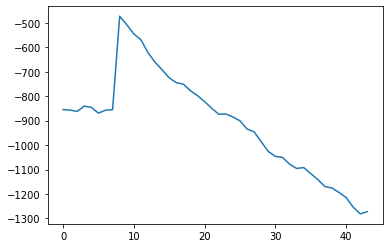

In [94]:
vals = []
for i in range(0, 44):
    vals.append(covar_eigvecs[i][0])
    
plt.plot(range(0,44), vals)
plt.show()